<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/4_1_Standardize_your_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

In [ ]:
df_zoom['genre'].unique()

array(['Country', 'Classical'], dtype=object)

<Axes: xlabel='duration_ms', ylabel='speechiness'>

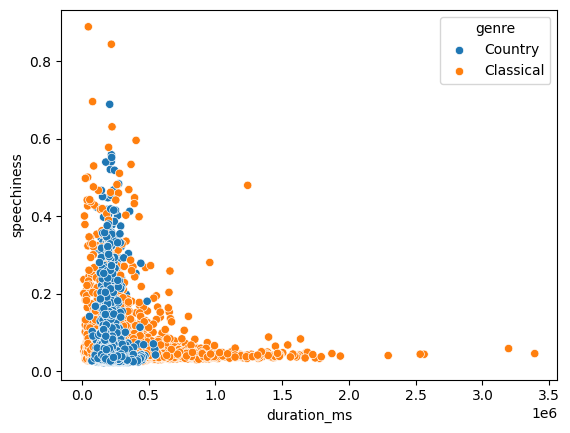

In [ ]:
sns.scatterplot(df_zoom, x='duration_ms', y='speechiness' ,hue='genre')

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [ ]:
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Your code here :
X = df_zoom[['duration_ms','speechiness']]
y= df_zoom['genre'].apply(lambda x : 0 if x=="Country" else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLR = LogisticRegression(random_state=2)
modelLR.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [ ]:
y_pred = modelLR.predict(X_test)

In [ ]:
train_score = accuracy_score(y_train, y_pred=modelLR.predict(X_train))
test_score = accuracy_score( y_test, y_pred)

In [ ]:
print(train_score)
print(test_score)

0.6544642857142857
0.6580357142857143


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predKNN = modelKNN.predict(X_test)

In [ ]:
train_accuracyKNN = accuracy_score(y_train, modelKNN.predict(X_train))
test_accuracyKNN = accuracy_score(y_test, y_predKNN)

In [ ]:
print(train_accuracyKNN)
print(test_accuracyKNN)

0.7979910714285714
0.7129464285714285


In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier


In [ ]:
modeltree = DecisionTreeClassifier()
modeltree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = modeltree.predict(X_test)

In [ ]:
train_accuracyTree = accuracy_score(y_train , modeltree.predict(X_train))
test_accuaracyTree = accuracy_score(y_test, y_pred_tree)

In [ ]:
print(train_accuracyTree)
print(test_accuaracyTree)

0.9997767857142857
0.7368303571428572



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Your code here :
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelLR.fit(X_train_scaled, y_train)
y_pred_scaledLG = modelLR.predict(X_test_scaled)
accuracyLG = accuracy_score(y_test, y_pred_scaledLG)
print(accuracyLG)

0.6669642857142857


In [ ]:
modelKNN.fit(X_train_scaled, y_train)
y_pred_scaledKNN =modelKNN.predict(X_test_scaled)
accuracyKNN = accuracy_score(y_test, y_pred_scaledKNN)
print(accuracyKNN)

0.7743303571428571


In [ ]:
modeltree.fit(X_train_scaled, y_train)
y_pred_scaledTree = modeltree.predict(X_test_scaled)
accuracyTree = accuracy_score(y_test, y_pred_scaledTree)
print(accuracyTree)


0.7330357142857142


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.